In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
plt.style.use("ggplot")

In [ ]:
# load data
student_info       = pd.read_csv("studentInfo.csv")
student_reg        = pd.read_csv("studentRegistration.csv")
student_assessment = pd.read_csv("studentAssessment.csv")
student_vle        = pd.read_csv("studentVle.csv")
courses            = pd.read_csv("courses.csv")
assessments        = pd.read_csv("assessments.csv")
vle                = pd.read_csv("vle.csv")

In [3]:
# sanity check
for name, df in {"student_info": student_info, "student_reg": student_reg,"student_assessment": student_assessment, "student_vle": student_vle}.items():
    print(f"{name:<20}", df.shape)

student_info         (32593, 12)
student_reg          (32593, 5)
student_assessment   (173912, 5)
student_vle          (10655280, 6)


In [4]:
# missing value &  summary 
def quick_overview(df, name):
    print(f"\n=== {name} ===")
    display(df.head())
    display(df.describe(include="all").transpose()[["count", "unique", "mean", "std", "min", "max"]])
    na = df.isna().mean().sort_values(ascending=False)
    display(na[na > 0].head(10).to_frame("pct_missing"))

quick_overview(student_info, "student_info")



=== student_info ===


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


,count,unique,mean,std,min,max
code_module,32593,7,NaN,NaN,NaN,NaN
code_presentation,32593,4,NaN,NaN,NaN,NaN
id_student,32593.0,NaN,706687.669131,549167.313855,3733.0,2716795.0
gender,32593,2,NaN,NaN,NaN,NaN
region,32593,13,NaN,NaN,NaN,NaN
highest_education,32593,5,NaN,NaN,NaN,NaN
imd_band,31482,10,NaN,NaN,NaN,NaN
age_band,32593,3,NaN,NaN,NaN,NaN
num_of_prev_attempts,32593.0,NaN,0.163225,0.479758,0.0,6.0
studied_credits,32593.0,NaN,79.758691,41.0719,30.0,655.0


,pct_missing
imd_band,0.034087


In [5]:
quick_overview(vle, "vle")


=== vle ===


,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


,count,unique,mean,std,min,max
id_site,6364.0,NaN,726099.094123,128315.137473,526721.0,1077905.0
code_module,6364,7,NaN,NaN,NaN,NaN
code_presentation,6364,4,NaN,NaN,NaN,NaN
activity_type,6364,20,NaN,NaN,NaN,NaN
week_from,1121.0,NaN,15.204282,8.792865,0.0,29.0
week_to,1121.0,NaN,15.214987,8.779806,0.0,29.0


,pct_missing
week_from,0.823853
week_to,0.823853


In [6]:
quick_overview(assessments, "assessments")


=== assessments ===


,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


,count,unique,mean,std,min,max
code_module,206,7,NaN,NaN,NaN,NaN
code_presentation,206,4,NaN,NaN,NaN,NaN
id_assessment,206.0,NaN,26473.975728,10098.625521,1752.0,40088.0
assessment_type,206,3,NaN,NaN,NaN,NaN
date,195.0,NaN,145.005128,76.001119,12.0,261.0
weight,206.0,NaN,20.873786,30.384224,0.0,100.0


,pct_missing
date,0.053398


In [7]:
quick_overview(student_reg, "student_reg")


=== student_reg ===


,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


,count,unique,mean,std,min,max
code_module,32593,7,NaN,NaN,NaN,NaN
code_presentation,32593,4,NaN,NaN,NaN,NaN
id_student,32593.0,NaN,706687.669131,549167.313855,3733.0,2716795.0
date_registration,32548.0,NaN,-69.4113,49.260522,-322.0,167.0
date_unregistration,10072.0,NaN,49.757645,82.46089,-365.0,444.0


,pct_missing
date_unregistration,0.690977
date_registration,0.001381


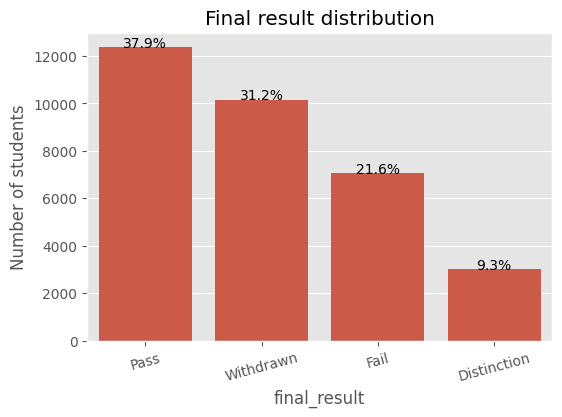

In [8]:
#target variable distribution
target_counts = student_info["final_result"].value_counts()
target_percentages = target_counts / target_counts.sum() * 100

plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title("Final result distribution")
plt.ylabel("Number of students")
plt.xticks(rotation=15)

# annotate each bar 
for i, (count, pct) in enumerate(zip(target_counts.values, target_percentages.values)):
    plt.text(i, count + 1, f'{pct:.1f}%', ha='center')

plt.show()
# binary success flag
student_info["success_flag"] = student_info["final_result"].isin(["Pass", "Distinction"]).astype(int)


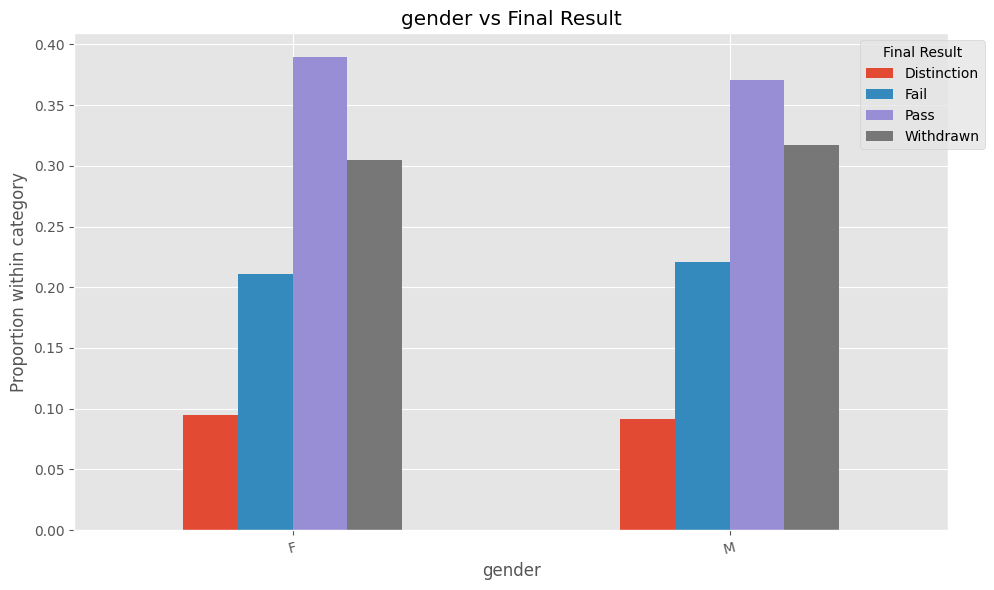

In [9]:
# demographic variables vs. outcome
ctab = pd.crosstab(student_info["gender"], student_info["final_result"], normalize="index")
ax = ctab.plot(kind="bar", stacked=False, figsize=(10,6))
ax.set_title("gender vs Final Result")
ax.set_ylabel("Proportion within category")
ax.legend(title="Final Result", bbox_to_anchor=(1.05, 1))
# plot
plt.xticks(rotation=15)
plt.tight_layout() 
plt.show()

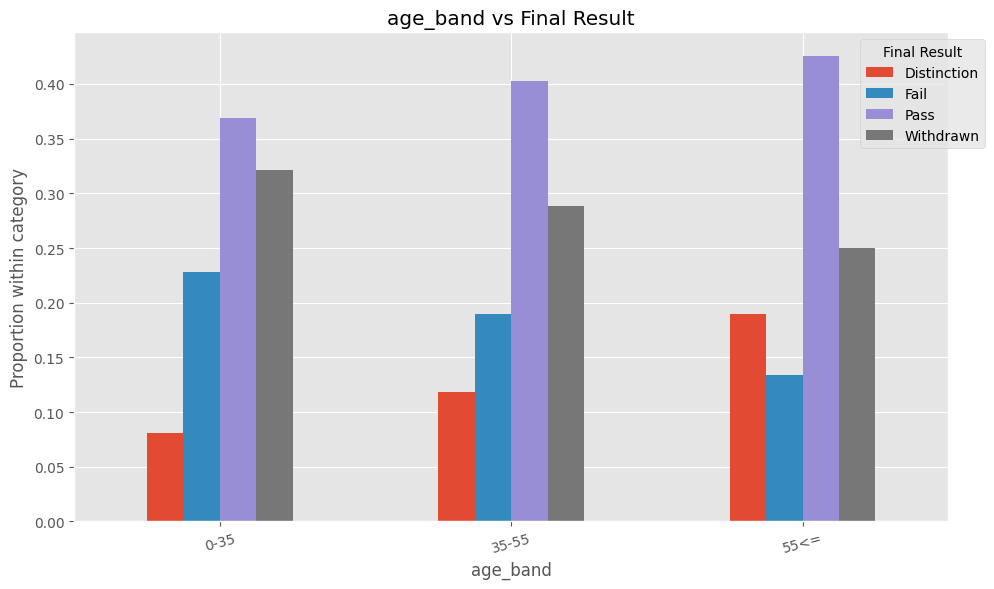

In [10]:
ctab = pd.crosstab(student_info["age_band"], student_info["final_result"], normalize="index")
ax = ctab.plot(kind="bar", stacked=False, figsize=(10,6))
ax.set_title("age_band vs Final Result")
ax.set_ylabel("Proportion within category")
ax.legend(title="Final Result", bbox_to_anchor=(1.05, 1))
# plot as a grouped bar chart
plt.xticks(rotation=15)
plt.tight_layout()   # make room for the legend
plt.show()

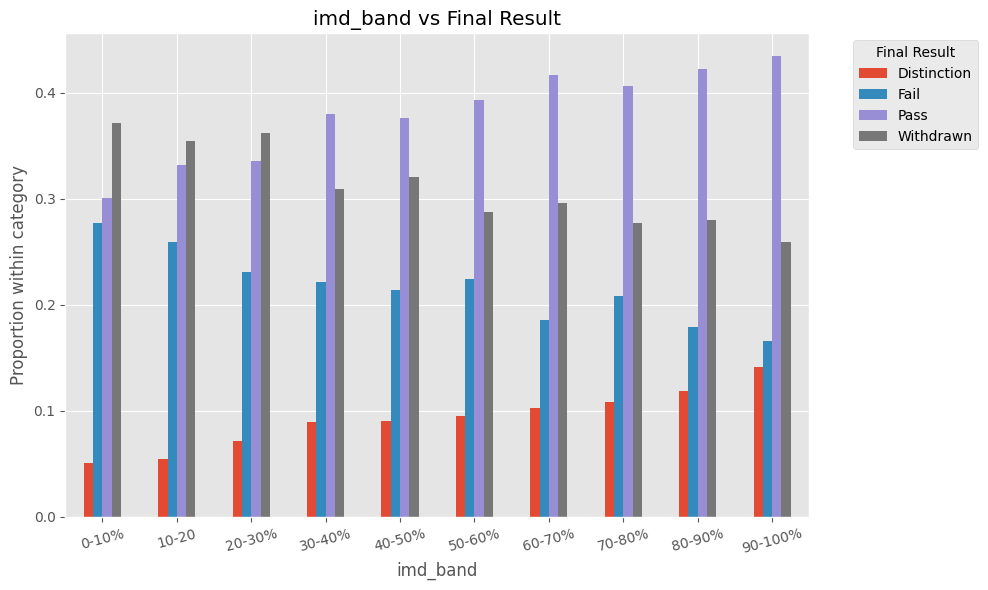

In [11]:
ctab = pd.crosstab(student_info["imd_band"], student_info["final_result"], normalize="index")
ax = ctab.plot(kind="bar", stacked=False, figsize=(10,6))
ax.set_title("imd_band vs Final Result")
ax.set_ylabel("Proportion within category")
ax.legend(title="Final Result", bbox_to_anchor=(1.05, 1))
# plot
plt.xticks(rotation=15)
plt.tight_layout() 
plt.show()

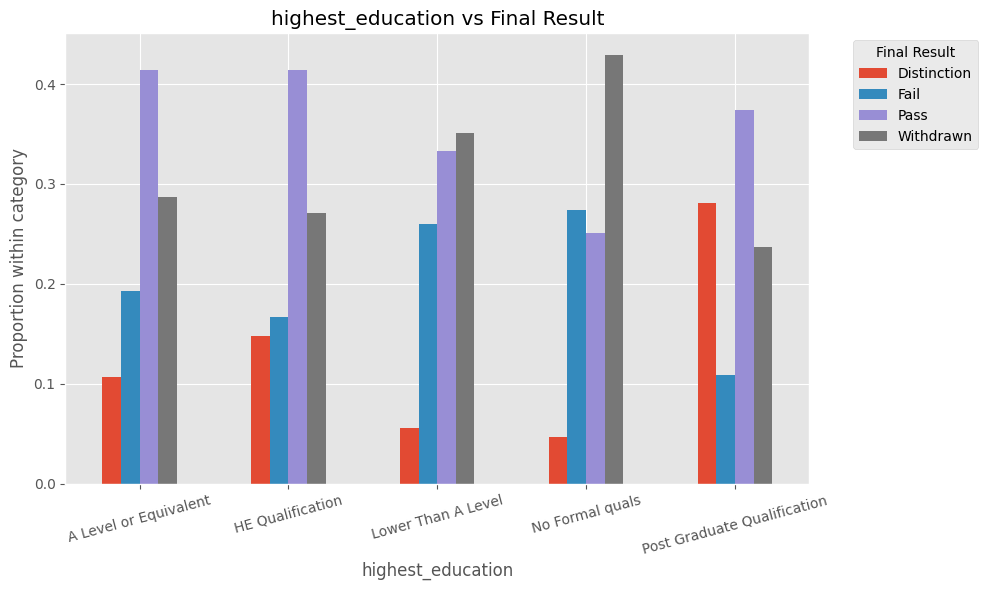

In [12]:
ctab = pd.crosstab(student_info["highest_education"], student_info["final_result"], normalize="index")
ax = ctab.plot(kind="bar", stacked=False, figsize=(10,6))
ax.set_title("highest_education vs Final Result")
ax.set_ylabel("Proportion within category")
ax.legend(title="Final Result", bbox_to_anchor=(1.05, 1))
# plot as a grouped bar chart
plt.xticks(rotation=15)
plt.tight_layout()   # make room for the legend
plt.show()

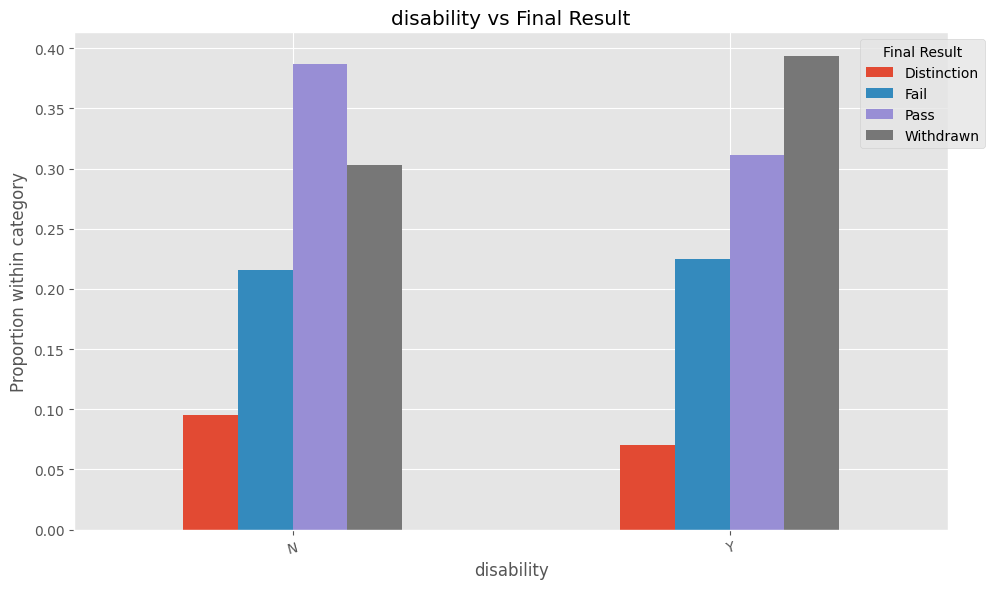

In [13]:
ctab = pd.crosstab(student_info["disability"], student_info["final_result"], normalize="index")
ax = ctab.plot(kind="bar", stacked=False, figsize=(10,6))
ax.set_title("disability vs Final Result")
ax.set_ylabel("Proportion within category")
ax.legend(title="Final Result", bbox_to_anchor=(1.05, 1))
# plot 
plt.xticks(rotation=15)
plt.tight_layout() 
plt.show()

In [14]:
# aggregate assessment data
assg_agg = (
    student_assessment
    .groupby("id_student")
    .agg(n_assessments=("id_assessment", "count"),avg_score=("score", "mean"),std_score=("score", "std"),n_submissions_missed=("is_banked", lambda s: s.eq("t").sum()))
)

# aggregate VLE clicks
vle_agg = (
    student_vle
    .groupby("id_student")
    .agg(total_clicks=("sum_click", "sum"),active_days=("date", "nunique"),first_activity=("date", "min"),last_activity=("date", "max")
    )
)

# engagement intensity-clicks per active
vle_agg["click_rate"] = vle_agg["total_clicks"] / vle_agg["active_days"]

# merge features
df = (student_info.merge(student_reg[["id_student", "date_registration", "date_unregistration"]], on="id_student", how="left").merge(assg_agg, on="id_student", how="left").merge(vle_agg, on="id_student", how="left"))
print("Merged df shape:", df.shape)


Merged df shape: (40801, 24)


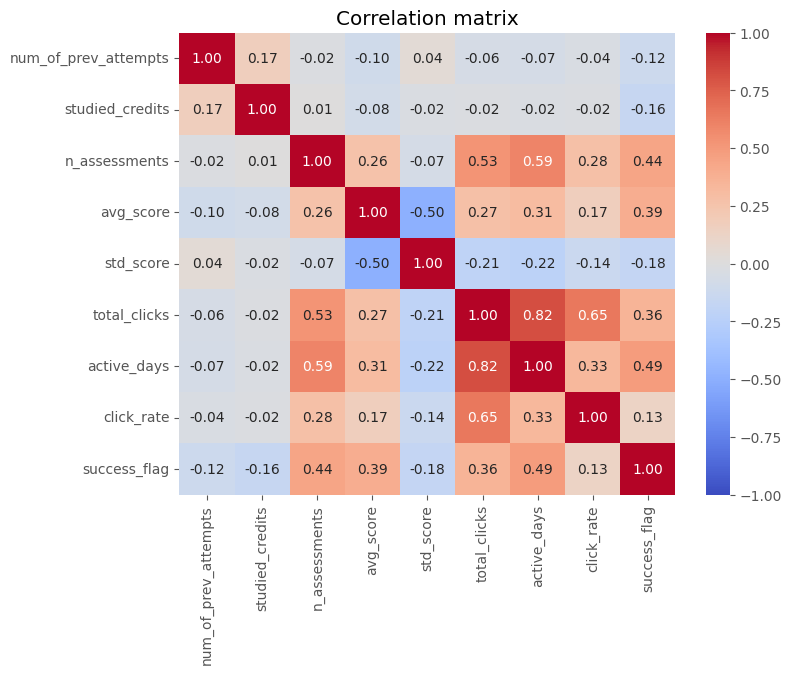

In [15]:
# Cell 8 – numeric correlation heatmap
numeric_cols = [
    "num_of_prev_attempts", "studied_credits",
    "n_assessments", "avg_score", "std_score",
    "total_clicks", "active_days", "click_rate"
]
corr = df[numeric_cols + ["success_flag"]].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation matrix")
plt.show()


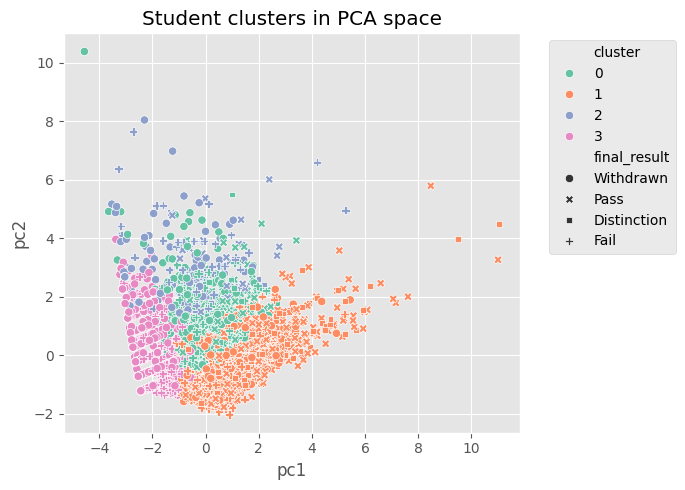

In [16]:
# feature matrix 
features = df[[
    "num_of_prev_attempts", "studied_credits",
    "avg_score", "std_score",
    "total_clicks", "click_rate"
]].fillna(0)

X = StandardScaler().fit_transform(features)

# using k=4 after tests
kmeans = KMeans(n_clusters=4, random_state=42, n_init="auto")
clusters = kmeans.fit_predict(X)
df["cluster"] = clusters

# pca
pca = PCA(n_components=2, random_state=42)
coords = pca.fit_transform(X)
df["pc1"], df["pc2"] = coords[:,0], coords[:,1]

plt.figure(figsize=(7, 5))
sns.scatterplot(
    x="pc1", y="pc2",
    hue="cluster", style="final_result",
    palette="Set2",  
    data=df.sample(8000, random_state=1)
)
plt.title("Student clusters in PCA space")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


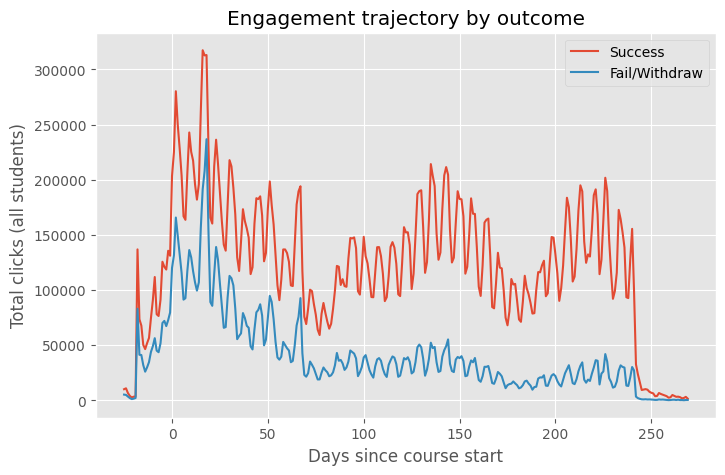

In [17]:
#click trajectory: success vs fail/withdraw
engagement = (
    student_vle
    .merge(student_info[["id_student", "success_flag"]], on="id_student")
    .groupby(["success_flag", "date"])
    .agg(total_clicks=("sum_click", "sum"))
    .reset_index()
)

plt.figure(figsize=(8,5))
for flag, label in [(1, "Success"), (0, "Fail/Withdraw")]:
    subset = engagement.query("success_flag == @flag")
    subset = subset.sort_values("date")
    plt.plot(subset["date"], subset["total_clicks"], label=label)
plt.xlabel("Days since course start")
plt.ylabel("Total clicks (all students)")
plt.title("Engagement trajectory by outcome")
plt.legend()
plt.show()
